Problem 1 - Data Read, Write and Inspect:

Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("bank.csv")
print(df)

#2a
object_column = df.select_dtypes(include ="object").columns
print("object columns:\n",object_column)

#2b
print("\nUnique values in object columns:")
for column in object_column:
      print(f"\nColumn: {column}")
      print(df[column].unique())

#2c
print("\n Null values per column: ")
print(df.isnull().sum())

#3
df_numeric = df.drop(columns=object_column)
df_numeric.to_csv("banknumericdata.csv", index=False)
print("Saved as banknumericdata.csv")

#4
df_new = pd.read_csv("banknumericdata.csv")
print("\nSummary Statistics:")
print(df_new.describe())






Saving bank.csv to bank (11).csv
   age         job  marital  balance
0   30  unemployed  married     1787
1   33    services   single     4789
2   40  management  married     2000
3   28     student   single      500
object columns:
 Index(['job', 'marital'], dtype='object')

Unique values in object columns:

Column: job
['unemployed' 'services' 'management' 'student']

Column: marital
['married' 'single']

 Null values per column: 
age        0
job        0
marital    0
balance    0
dtype: int64
Saved as banknumericdata.csv

Summary Statistics:
             age      balance
count   4.000000     4.000000
mean   32.750000  2269.000000
std     5.251984  1805.957364
min    28.000000   500.000000
25%    29.500000  1465.250000
50%    31.500000  1893.500000
75%    34.750000  2697.250000
max    40.000000  4789.000000


Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [2]:
from google.colab import files
uploaded = files.upload()

#1
import pandas as pd
df = pd.read_csv("medical_student.csv")
print(df.head())

#2
print("\nDataset info: ",df.info())
print("\nThe misssing value per column: ",df.isnull().sum())

#3
# For missing age value i used median because median is robust to outliers
# and preserves the central tendency and some student may have unusually high
# or low age, so media is better in this case.
df['Age'] = df['Age'].fillna(df['Age'].median())

# For missing GPA value, I used mean because GPA is usually normally distributed
# and filling missing values with mean maintains the overall average GPA
# without skewing the data.
df['GPA'] = df['GPA'].fillna(df['GPA'].mean())

# For missing Department value, I used mode (most frequent category)
# because Department is categorical. Mode preserves the most common category
# and avoids introducing unknown values.
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
print("\n Missing values after imputation: ",df.isnull().sum())

#4
duplicate_values = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_values}")
df = df.drop_duplicates()

print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")
print("\nCleaned dataset preview:",df.head())







Saving medical_student.csv to medical_student (10).csv
      Name   Age Department  GPA
0    Alice  22.0       MBBS  3.5
1      Bob  23.0       MBBS  3.7
2  Charlie   NaN        BDS  3.2
3    David  24.0        NaN  3.8
4      Eve  21.0       MBBS  NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        7 non-null      object 
 1   Age         6 non-null      float64
 2   Department  6 non-null      object 
 3   GPA         6 non-null      float64
dtypes: float64(2), object(2)
memory usage: 356.0+ bytes

Dataset info:  None

The misssing value per column:  Name          0
Age           1
Department    1
GPA           1
dtype: int64

 Missing values after imputation:  Name          0
Age           0
Department    0
GPA           0
dtype: int64

Number of duplicate rows: 1
Number of duplicate rows after removal: 0

Cleaned dataset preview:    

Dataset Used: "titanic.csv"

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [6]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
df = pd.read_csv("ttitanic.csv")
df.columns = df.columns.str.strip()
print(df.head())

df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

subset= df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
print("\nSubset of dataset:\n", subset.head())

first_class= subset[subset['Pclass'] == 1]
print("\nFirst-class passengers:\n", first_class.head())

fare_mean = first_class['Fare'].mean()
fare_median = first_class['Fare'].median()
fare_max = first_class['Fare'].max()
fare_min = first_class['Fare'].min()

print("\nFare statistics for first-class passengers:")
print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")



Saving ttitanic.csv to ttitanic (1).csv
                                                Name  Pclass     Sex  Age  \
0                            Braund, Mr. Owen Harris       3    male   22   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female   38   
2                             Heikkinen, Miss. Laina       3  female   26   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female   35   

      Fare  Survived Embarked  
0   7.2500         0        S  
1  71.2833         1        C  
2   7.9250         0        S  
3  53.1000         0        S  

Subset of dataset:
                                                 Name  Pclass     Sex  Age  \
0                            Braund, Mr. Owen Harris       3    male   22   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female   38   
2                             Heikkinen, Miss. Laina       3  female   26   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female   35   

      F

Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [7]:

null_age = first_class['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_age}")

first_class = first_class.dropna(subset=['Age'])
print(f"Number of null values in 'Age' after dropping: {first_class['Age'].isnull().sum()}")

Number of null values in 'Age': 0
Number of null values in 'Age' after dropping: 0


Problem - 3:
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:


• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [8]:
from google.colab import files
uploaded = files.upload()


import pandas as pd
df = pd.read_csv("ttitanic.csv")
df.columns = df.columns.str.strip()
print(df.head())

# 1
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

#2
df = pd.concat([df, embarked_dummies], axis=1)

#3
df = df.drop('Embarked', axis=1)

#4
print("\nDataFrame after one-hot encoding 'Embarked':\n", df.head())


Saving ttitanic.csv to ttitanic (2).csv
                                                Name  Pclass     Sex  Age  \
0                            Braund, Mr. Owen Harris       3    male   22   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female   38   
2                             Heikkinen, Miss. Laina       3  female   26   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female   35   

      Fare  Survived Embarked  
0   7.2500         0        S  
1  71.2833         1        C  
2   7.9250         0        S  
3  53.1000         0        S  

DataFrame after one-hot encoding 'Embarked':
                                                 Name  Pclass     Sex  Age  \
0                            Braund, Mr. Owen Harris       3    male   22   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female   38   
2                             Heikkinen, Miss. Laina       3  female   26   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       

Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean survival rate by gender: Sex
female    0.333333
male      0.000000
Name: Survived, dtype: float64


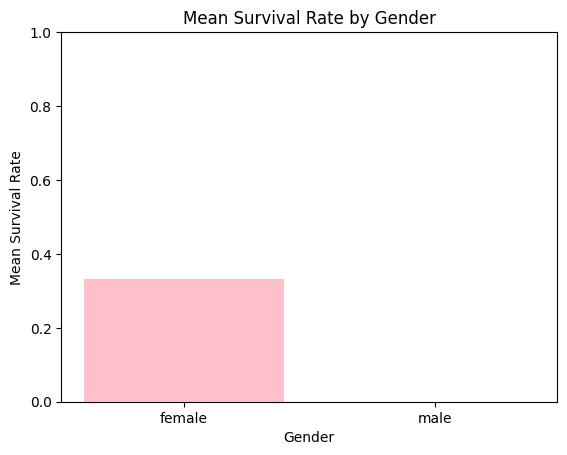

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ttitanic.csv")

mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean survival rate by gender:",mean_survival_by_sex)

plt.bar(mean_survival_by_sex.index, mean_survival_by_sex.values, color=['pink', 'lightblue'])
plt.title("Mean Survival Rate by Gender")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Gender")
plt.ylim(0,1)
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Mean survival rate by gender and embarkation port: Embarked    C    S
Sex               
female    1.0  0.0
male      0.0  0.0


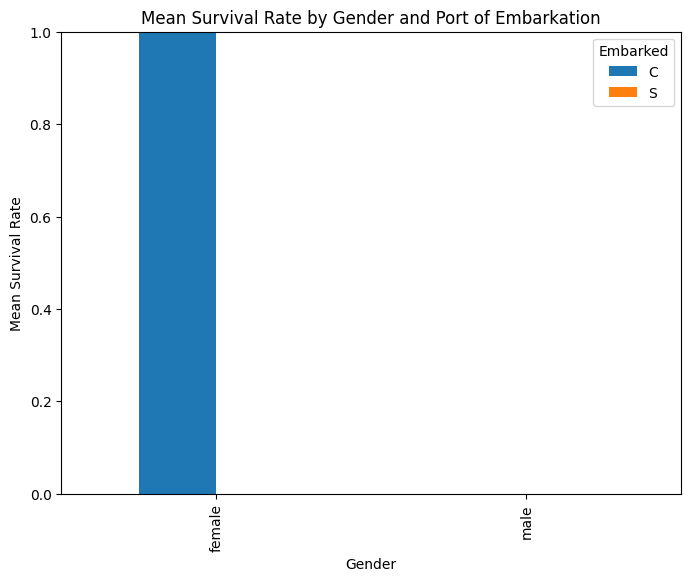

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ttitanic.csv")

df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

mean_survival = df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
mean_survival = mean_survival.fillna(0)
print("Mean survival rate by gender and embarkation port:",mean_survival)

mean_survival.plot(kind='bar', figsize=(8,6))
plt.title("Mean Survival Rate by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Gender")
plt.ylim(0,1)
plt.legend(title="Embarked")
plt.show()
